In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [3]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [4]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [5]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     180 non-null    object        
 1   month      180 non-null    int32         
 2   year       180 non-null    int32         
 3   tb         180 non-null    int64         
 4   longitude  180 non-null    float64       
 5   latitude   180 non-null    float64       
 6   time       180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 8.6+ KB


Merapihkan Data TB 2020-2023

In [6]:
import calendar

In [7]:
# Filter for years 2020-2022
df_tb = df_excel[(df_excel['year'] >= 2020) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT, month, and time
tb_total = df_tb.groupby(['KABKOT', 'month', 'time'])['tb'].sum()
tb_total

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    715
                      2021-01-01    329
                      2022-01-01    851
               2      2020-02-01    803
                      2021-02-01    326
                                   ... 
JAKARTA UTARA  11     2021-11-01    475
                      2022-11-01    685
               12     2020-12-01    201
                      2021-12-01    450
                      2022-12-01    671
Name: tb, Length: 180, dtype: int64

Merapihkan Data PM 2.5 2020-2023

In [8]:
df_pm25 = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/PM_25/dissolved_result_pm25_3years.csv')
df_pm25 = df_pm25.drop(['Unnamed: 0'], axis=1)
print(df_pm25.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'pm2p5', 'time'], dtype='object')


In [9]:
# Filter for years 202p-2022
df_pm25 = df_pm25[(df_pm25['year'] >= 2020) & (df_pm25['year'] <= 2022)]

# Group pm25_mean by KABKOT, month, and time
pm25_mean = df_pm25.groupby(['KABKOT', 'month', 'time'])['pm2p5'].mean()
pm25_mean

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    39.201529
                      2021-01-01    38.770220
                      2022-01-01    40.907131
               2      2020-02-01    38.279912
                      2021-02-01    36.977892
                                      ...    
JAKARTA UTARA  11     2021-11-01    40.649527
                      2022-11-01    46.806576
               12     2020-12-01    30.788003
                      2021-12-01    42.553266
                      2022-12-01    39.195320
Name: pm2p5, Length: 180, dtype: float64

Merge Files

In [10]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_pm25 = pd.merge(tb_total, pm25_mean, on=['KABKOT', 'month'])
df_tb_pm25

tb      pm2p5
KABKOT        month                
JAKARTA BARAT 1      715  39.201529
              1      715  38.770220
              1      715  40.907131
              1      329  39.201529
              1      329  38.770220
...                  ...        ...
JAKARTA UTARA 12     450  42.553266
              12     450  39.195320
              12     671  30.788003
              12     671  42.553266
              12     671  39.195320

[540 rows x 2 columns]

In [11]:
df_tb_pm25 = df_tb_pm25.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'pm2p5':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [12]:
df_tb_pm25

,KABKOT,month,tb,pm2p5
0,JAKARTA BARAT,1,5685,39.626294
1,JAKARTA BARAT,2,4758,39.570708
2,JAKARTA BARAT,3,5376,47.155767
3,JAKARTA BARAT,4,4578,54.594935
4,JAKARTA BARAT,5,4125,59.402061
5,JAKARTA BARAT,6,4920,60.727007
6,JAKARTA BARAT,7,4272,62.285747
7,JAKARTA BARAT,8,4539,62.162046
8,JAKARTA BARAT,9,5070,58.836619
9,JAKARTA BARAT,10,5145,56.057885


In [13]:
df_tb_pm25.shape

(60, 4)

Datetime edit for 'month'

In [14]:
import calendar

# Format for monthly graph
df_tb_pm25['month'] = pd.to_datetime(df_tb_pm25['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_pm25= df_tb_pm25.set_index('month').reset_index()

In [15]:
df_tb_pm25

,month,KABKOT,tb,pm2p5
0,January,JAKARTA BARAT,5685,39.626294
1,February,JAKARTA BARAT,4758,39.570708
2,March,JAKARTA BARAT,5376,47.155767
3,April,JAKARTA BARAT,4578,54.594935
4,May,JAKARTA BARAT,4125,59.402061
5,June,JAKARTA BARAT,4920,60.727007
6,July,JAKARTA BARAT,4272,62.285747
7,August,JAKARTA BARAT,4539,62.162046
8,September,JAKARTA BARAT,5070,58.836619
9,October,JAKARTA BARAT,5145,56.057885


Overlay layer plot for TB and PM 2.5

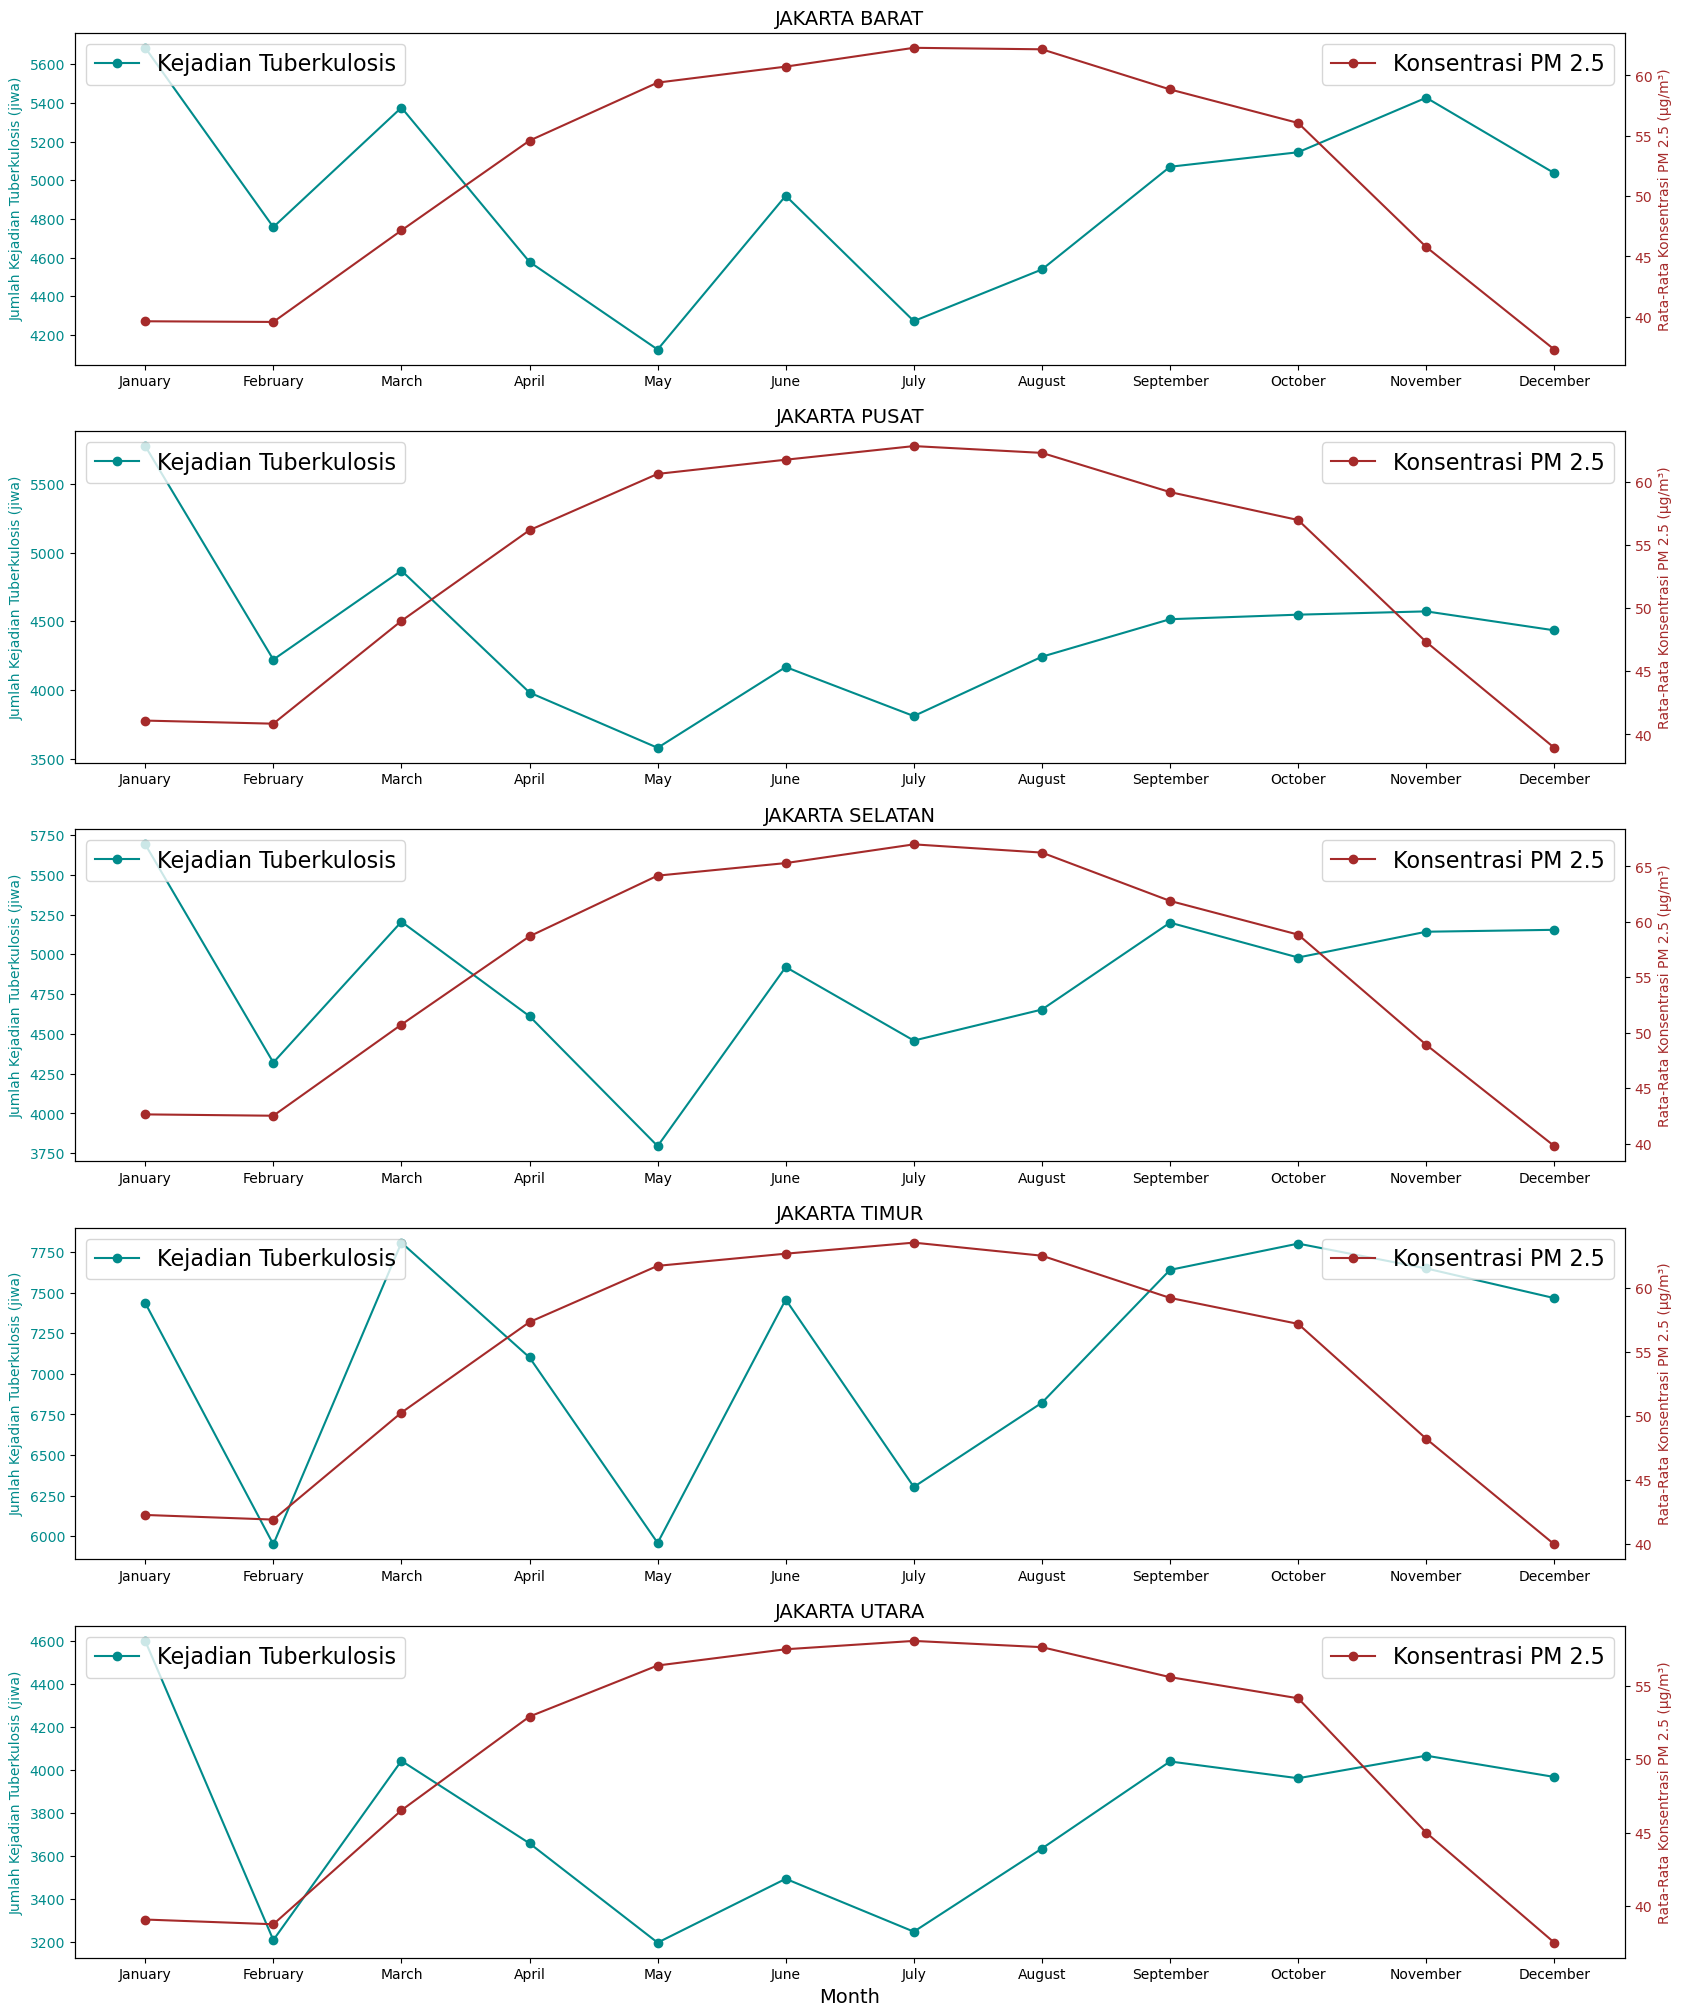

In [16]:
indicators = ['tb', 'pm2p5']

# Group data by KABKOT
grouped_data = df_tb_pm25.groupby('KABKOT')

# Plot time series for 'tb' and 'pm25' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['pm2p5']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Konsentrasi PM 2.5', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Konsentrasi PM 2.5 (µg/m³)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()